In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
import torch_geometric.transforms as T
from torch_geometric.datasets.dblp import DBLP
import matplotlib.pyplot as plt

## DBLP

In [2]:
dataset = DBLP(root='./dblp_data', transform=T.Constant(node_types='conference'))
data = dataset[0]
author = data['author'].x.tolist()
df = pd.DataFrame(author)
df['class'] = data['author'].y.tolist()

### Feature selection from Bag-of-Words features of Author node using most frequent occurences

In [3]:
def feature_selection_var(X, threshold=0.0):
    sel = VarianceThreshold(threshold=(threshold * (1 - threshold)))
    fitted_X = sel.fit_transform(X)
    imp_feat = pd.DataFrame(fitted_X)

    return imp_feat

In [4]:
# Feature selection for Author class 0
class0 = df[df['class'] == 0].drop(['class'], axis=1)

imp_feat0 =  feature_selection_var(class0, threshold=0.935).iloc[:, : 50]
imp_feat0.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Feature selection for Author class 1
class1 = df[df['class'] == 1].drop(['class'], axis=1)

imp_feat1 =  feature_selection_var(class1, threshold=0.928).iloc[:, : 50]
imp_feat1.head()
imp_feat1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Feature selection for Author class 2
class2 = df[df['class'] == 2].drop(['class'], axis=1)

imp_feat2 =  feature_selection_var(class2, threshold=0.949).iloc[:, : 50]
imp_feat2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Feature selection for Author class 3
class3 = df[df['class'] == 3].drop(['class'], axis=1)

imp_feat3 =  feature_selection_var(class3, threshold=0.95).iloc[:, : 50]
imp_feat3.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features of each class of Author node sampled using Diffusion Models

In [8]:
node_feat_path = '../../../../graph generator/diffusion models/sampled_features_diffusion/no_dependence/tabddpm/dblp/'

In [9]:
sampled0  = pd.DataFrame(np.load(node_feat_path + 'author0_tabddpm_variance50.npy',allow_pickle=True))
sampled0.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [10]:
sampled1  = pd.DataFrame(np.load(node_feat_path + 'author1_tabddpm_variance50.npy',allow_pickle=True))
sampled1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
sampled2  = pd.DataFrame(np.load(node_feat_path + 'author2_tabddpm_variance50.npy',allow_pickle=True))
sampled2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [12]:
sampled3  = pd.DataFrame(np.load(node_feat_path + 'author3_tabddpm_variance50.npy',allow_pickle=True))
sampled3.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [13]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

### Pairwise cosine similarity of all features for real and synthetic distributions

Author class 0

In [14]:
real_class0= np.array(imp_feat0)
cosine_sim(real_class0,sampled0)

array([[0.        , 0.        , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.3086067 , 0.37796447, 0.        , ..., 0.33407655, 0.3380617 ,
        0.14285714],
       [0.14433757, 0.1767767 , 0.20412415, ..., 0.4375    , 0.15811388,
        0.13363062],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28867513, 0.        , 0.        , ..., 0.25      , 0.        ,
        0.26726124]])

In [15]:
sns.set(font_scale=1.4)

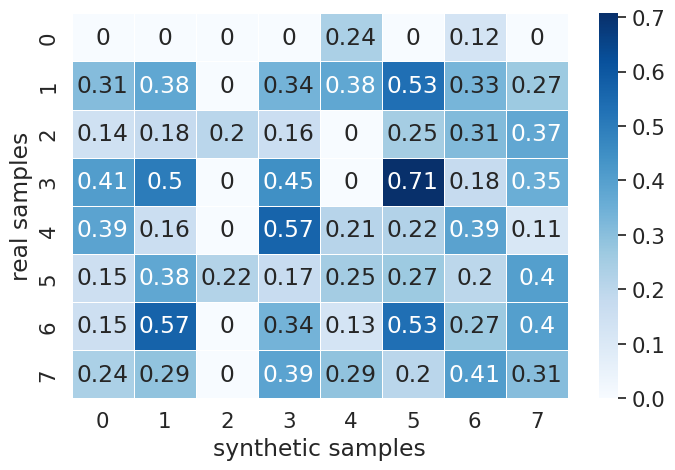

In [16]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [17]:
avg_cossim_class0 = np.mean(cosine_sim(real_class0,sampled0))
avg_cossim_class0

0.21220302604928884

Author class 1

In [18]:
real_class1= np.array(imp_feat1)
cosine_sim(real_class1,sampled1)

array([[0.        , 0.        , 0.5       , ..., 0.14744196, 0.125     ,
        0.14433757],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.49236596, 0.30151134, 0.21320072, ..., 0.31434731, 0.47970161,
        0.49236596],
       ...,
       [0.28867513, 0.        , 0.        , ..., 0.        , 0.125     ,
        0.14433757],
       [0.40824829, 0.        , 0.        , ..., 0.        , 0.1767767 ,
        0.        ],
       [0.18257419, 0.        , 0.        , ..., 0.09325048, 0.15811388,
        0.09128709]])

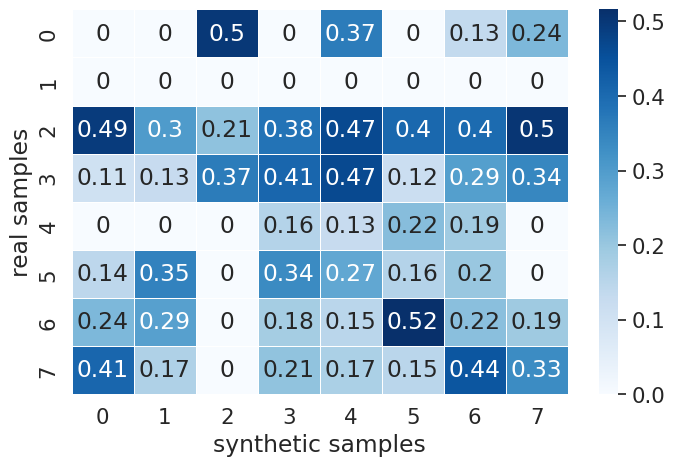

In [19]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [20]:
avg_cossim_class1 = np.mean(cosine_sim(real_class1,sampled1))
avg_cossim_class1

0.23514424831256756

Author class 2

In [21]:
real_class2= np.array(imp_feat2)
cosine_sim(real_class2,sampled2)

array([[0.        , 0.25819889, 0.24618298, ..., 0.23570226, 0.        ,
        0.22645541],
       [0.1767767 , 0.31622777, 0.30151134, ..., 0.21650635, 0.20412415,
        0.2773501 ],
       [0.11785113, 0.31622777, 0.50251891, ..., 0.38490018, 0.13608276,
        0.46225016],
       ...,
       [0.        , 0.        , 0.        , ..., 0.14433757, 0.        ,
        0.2773501 ],
       [0.        , 0.        , 0.24618298, ..., 0.35355339, 0.        ,
        0.33968311],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

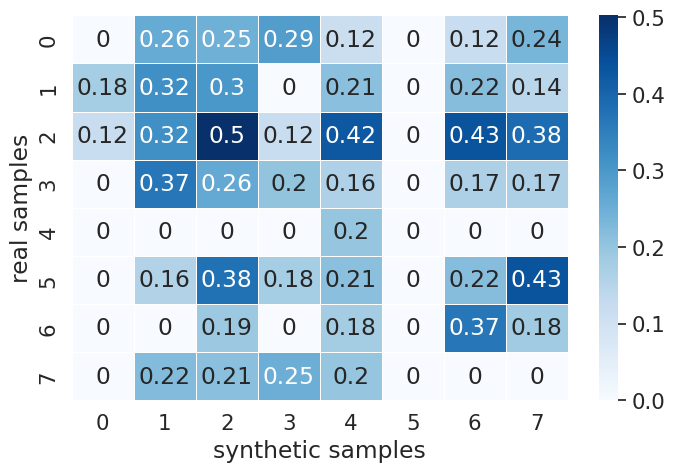

In [22]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [23]:
avg_cossim_class2 = np.mean(cosine_sim(real_class2,sampled2))
avg_cossim_class2

0.1344971003954558

Author class 3

In [24]:
real_class3 = np.array(imp_feat3)
cosine_sim(real_class3,sampled3)

array([[0.26726124, 0.23570226, 0.        , ..., 0.31622777, 0.70710678,
        0.        ],
       [0.3380617 , 0.2981424 , 0.        , ..., 0.2       , 0.        ,
        0.        ],
       [0.41833001, 0.42163702, 0.        , ..., 0.14142136, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.4472136 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

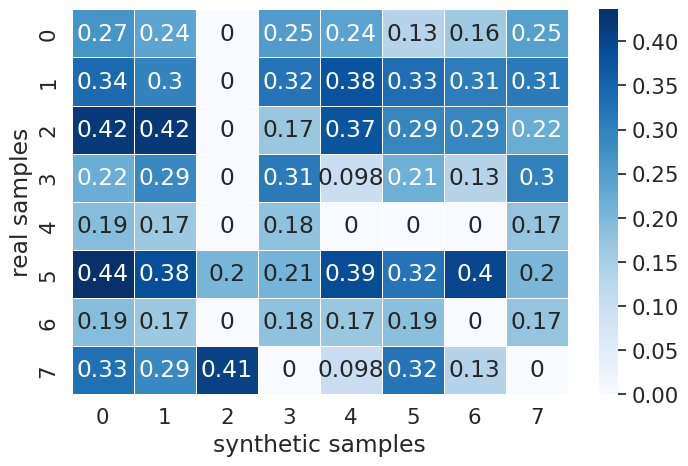

In [25]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class3[:8],sampled3[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [26]:
avg_cossim_class3 = np.mean(cosine_sim(real_class3,sampled3))
avg_cossim_class3

0.2028719950074216

In [27]:
(avg_cossim_class0 + avg_cossim_class1 +avg_cossim_class2 + avg_cossim_class3)/4

0.19617909244118345